In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_true = np.array([1,1,0,0,1])
y_predicted = np.array([0.30,0.7,0.9,0.1,0.5])

In [ ]:
def mae(y_true, y_predicted):
  total_error = 0
  for yt,yp in zip(y_true,y_predicted):
    total_error+=abs(yt-yp)

  print("Total Error : {}".format(total_error))

  mae= total_error / len(y_true)
  print("MAE : {}".format(mae))

  return mae

In [ ]:
mae = mae(y_true,y_predicted)

Total Error : 2.5
MAE : 0.5


In [ ]:
mae

0.5

In [ ]:
# Fonksiyonsuz !!!

np.mean(abs(y_true- y_predicted))

0.5

In [ ]:
def mse(y_true, y_predicted):
  total_error = 0
  for yt,yp in zip(y_true,y_predicted):
    total_error+=(yt-yp)**2

  print("Total Error : {}".format(total_error))

  mse= total_error / len(y_true)
  print("MSE : {}".format(mse))

  return mse

In [ ]:
mse = mse(y_true,y_predicted)

Total Error : 1.6500000000000001
MSE : 0.33


In [ ]:
# Fonksiyonsuz !!!

np.mean((y_true- y_predicted)**2)

0.33

In [ ]:
# Log Loss Yaz !!!
def log_loss(y_true,y_predictied,epsilon = 1e-15):

  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i,(1-epsilon)) for i in y_predicted_new]

  y_predicted_new = np.array(y_predicted_new)

  # 1.Adım :
  # Şimdi düşünelim np.log(y_predicted) için
  # Eğer y_predicted değerinden biri 0'a sahip olsaydı bizim sonucumuz "inf" çıkardı.
  # Epsilon = 1e-15 diyelim; 0 değerlerimizi epsilon değeri ile değiştirirelim ve max değerlerini alalım. Örnek "max(0,1e-15)" ise bu 1e-15 dönecek 
  # Max dedik sıfır istemiyoruz
  # Yapılan işlemleri yeni y_predicted_new değerlerini ile eşitleyelim

  # 2.Adım:
  # Şimdi de np.log(1-y_predicted) için düşünelim
  # Eğer bu değerlerin içinde 1 değeri olursa nolur ? Yine "inf" değerini alırız biz bunu yine istemeyiz
  # Bu seferde bu değerleri "min(1, (1-epsilon))" ile yerlerini değiştireceğiz. Min dedik 1 istemiyoruz
  # Yine bu değiştirelen değerleri y_predicted_new ile eşitleyelim

  # Ve artık fonksiyonu kullanmaya hazırız !!!!
  # Not : Epsilon değerinin şeçtik çünkü bir değişim yapıcaz buda en küçük epsilon değeri ile olması gerekiyor

  log_loss = -np.mean( (y_true*np.log(y_predicted_new)) + ( (1-y_true)*np.log(1-y_predicted_new) ) ) 

  return log_loss

In [ ]:
# 0.6659629339252124
y_true = np.array([1,1,0,0,1,1,0])
y_predicted = np.array([0.30,0.7,0.9,0.1,0.5,1,0])

log_loss(y_true, y_predicted)


0.6659629339252124

# Gradient Descent

In [ ]:
path = "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/6_gradient_descent/insurance_data.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df[["age","affordibility"]], df["bought_insurance"], test_size = 0.2, random_state = 25)

In [ ]:
# Biz burda 0 ile 1 arasında değerler isteriz 
# Age Değişecek
# Affordibility Kalabilir 

print("Age For X_train Max Values : {}".format(X_train["age"].max()))
print("Age For X_train Max Values : {}".format(X_train["age"].min()))
print()
print("Affordibility For X_train max Values : {}".format(X_train["affordibility"].max()))
print("Affordibility For X_train Min Values : {}".format(X_train["affordibility"].min()))

Age For X_train Max Values : 62
Age For X_train Max Values : 18

Affordibility For X_train max Values : 1
Affordibility For X_train Min Values : 0


In [ ]:
# istersek from sklearn.preprocessing import MinMaxScaler yapabiliriz manuel olarak yaptık !!!

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_test_scaled["age"] = X_test_scaled["age"]  / 100
X_train_scaled["age"] = X_train_scaled["age"]  / 100

In [ ]:
# İstediğimize ulaştık

print("Age For X_train Max Values : {}".format(X_train_scaled["age"].max()))
print("Age For X_train Max Values : {}".format(X_train_scaled["age"].min()))
print()
print("Affordibility For X_train max Values : {}".format(X_train_scaled["affordibility"].max()))
print("Affordibility For X_train Min Values : {}".format(X_train_scaled["affordibility"].min()))

Age For X_train Max Values : 0.62
Age For X_train Max Values : 0.18

Affordibility For X_train max Values : 1
Affordibility For X_train Min Values : 0


In [ ]:
# Tensorflow'dan basit bir işlem yapalım

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#(https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/6_gradient_descent/nn.png)

In [ ]:
model = Sequential()

model.add(Dense(1, input_shape = (2,), activation = "sigmoid", kernel_initializer="ones",bias_initializer="zeros"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs = 5000)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2505/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2506/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2507/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2508/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2509/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5318 - accuracy: 0.7273
Epoch 2510/5000
1/1 [==============================] - 0s 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[0.70548487],
       [0.3556955 ],
       [0.16827849],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [ ]:
# Loss ile Accuracy Değeri

model.evaluate(X_test_scaled,y_test,)

1/1 [==============================] - 0s 301ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [ ]:
coef, intercept = model.get_weights()
coef,intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32), array([-2.9137027], dtype=float32))

In [ ]:
# This means w1=5.060867, w2=1.4086502, bias =-2.9137027

# age*coef[0] + affordibility*coef[1] + intercept Asıl fonksiyonumuz !!
#    age*w1   +    affordibility*w2   + intercept Asıl fonksiyonumuz !!

# age, affordibility coef değerleri sırasıyla aslında bunlar weights değerlerimiz

coef

array([[5.060867 ],
       [1.4086502]], dtype=float32)

In [ ]:
# Bias Değeri 

intercept

array([-2.9137027], dtype=float32)

In [ ]:
# Activation Functions 
# Basic olarak burda np.array() kullanılmaz

def sigmoid(values):

  import math

  func = 1 / (1 + math.exp(-values))

  return func

In [ ]:
sigmoid(18)

0.9999999847700205

In [ ]:
def predicted_function(age, affordibility):
  
  # Değerler giricek sonra activation function'dan geçicek !!!

  weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
  
  results = sigmoid(weighted_sum)

  return results

In [ ]:
predicted_function(.18, 1)

0.35569549781937626

In [ ]:
predicted_function(.47, 1)

0.7054848693136117

In [ ]:
# Activation Functions 

def sigmoid(values):

  results = 1 / (1 + np.exp(-values))

  return results

In [ ]:
sigmoid(18)

0.9999999847700205

In [ ]:
sigmoid(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
# Tekrardan yazalım 

def log_loss(y_true,y_predicted,epsilon = 1e-15):

   # 0 için
   y_predicted_new = [max(i,epsilon) for i in y_predicted]
   # 1 için
   y_predicted_new = [min(i,(1-epsilon)) for i in y_predicted_new]

   # Array Çevir

   y_predicted_new = np.array(y_predicted_new)

   log_loss = -np.mean( (y_true*np.log(y_predicted_new)) + ((1-y_true)*np.log(1-y_predicted_new)) )

   return log_loss

In [ ]:
# 0.6659629339252124
y_true = np.array([1,1,0,0,1,1,0])
y_predicted = np.array([0.30,0.7,0.9,0.1,0.5,1,0])

log_loss(y_true,y_predicted)

0.6659629339252124

In [ ]:
def gradient_descent(age, affordability, y_true, epochs , loss_threshold):
  
  # Bunları yukardaki örneklere göre yapıyorum
  w1=w2=1
  bias = 0
  learning_rate = 0.5
  n = len(age)
  loss_list = []

  for i in range(epochs):
    
    # Burda en önemli nokta !!! y_predicted-y_true ;
    # Normalde y_true-y_predicted kullanılır ama burda değil !! Formul diyor !!
    
    # ilk önce bir tahmin edicek
    weighted_sum = w1*age + w2*affordability + bias

    # Sonra activation functions'dan geçiricek
    y_predicted = sigmoid(weighted_sum)

    # Loss değerini bulucak biz burda logloss kullanacağız!
    loss = log_loss(y_true, y_predicted)

    # Weigth Değerlerini Değiştiriyoruz # Türev Kısmı
    # np.dot([1,2,3,4],[3,4,5,6]) --- > 50 Değeri Çıkar. (Çarpıp sonra Toplar)
    w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
    
    # Bias Değerini Değiştiriyoruz
    biasd = np.mean((y_predicted-y_true))

    w1 = w1 - learning_rate*w1d
    w2 = w2 - learning_rate*w2d
    bias = bias - learning_rate*biasd

    if i % 10 == 0:

        print(f"Epoch : {i:{10}}, w1 : {round(w1,4):{10}}, w2 : {round(w2,4):{10}}, bias : {round(bias,4):{10}}, loss : {round(loss,4)}")

    loss_list.append(loss)
    
    if loss <=loss_threshold:
      print("loss thresholds => loss BREAK!!!")
      break

  return w1,w2,bias,loss_list

In [ ]:
w1,w2,bias,loss_list = gradient_descent(X_train_scaled["age"] ,X_train_scaled["affordibility"], y_train, 1000, 0.4631)

Epoch :          0, w1 :     0.9749, w2 :     0.9483, bias :    -0.1134, loss : 0.7113
Epoch :         10, w1 :     0.9521, w2 :     0.8002, bias :    -0.6768, loss : 0.6052
Epoch :         20, w1 :     1.0748, w2 :     0.8785, bias :    -0.8714, loss : 0.5924
Epoch :         30, w1 :     1.2163, w2 :     0.9684, bias :    -1.0069, loss : 0.583
Epoch :         40, w1 :     1.3599, w2 :      1.045, bias :    -1.1249, loss : 0.5749
Epoch :         50, w1 :     1.5033, w2 :     1.1084, bias :    -1.2319, loss : 0.5676
Epoch :         60, w1 :     1.6458, w2 :     1.1607, bias :    -1.3302, loss : 0.561
Epoch :         70, w1 :      1.787, w2 :     1.2039, bias :    -1.4212, loss : 0.5549
Epoch :         80, w1 :     1.9267, w2 :     1.2396, bias :    -1.5061, loss : 0.5493
Epoch :         90, w1 :     2.0646, w2 :     1.2694, bias :    -1.5857, loss : 0.544
Epoch :        100, w1 :     2.2007, w2 :     1.2942, bias :    -1.6607, loss : 0.5391
Epoch :        110, w1 :     2.3348, w2 :     

In [ ]:
w1,w2, bias

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

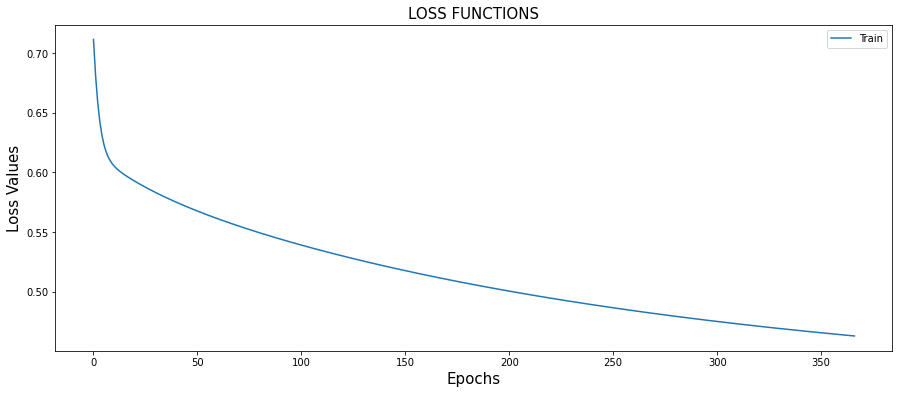

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(loss_list,label ="Train" )
plt.legend(loc = "best")
plt.title("LOSS FUNCTIONS", fontsize = 15)
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss Values", fontsize = 15)
plt.show()

In [ ]:
# Biz bunu bir class yapısına çevirelim !!!

class MyGD:

    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs,loss_thresholds,learning_rate = 0.5):
        
        # Aşağıdan çağırdık onu !!!
        self.w1,self.w2,self.bias = self.gradient_descent(X["age"], X["affordibility"], y ,epochs , loss_thresholds,learning_rate)
        
        print(f"Final Weights and Bias :\nw1 : {self.w1},w2 : {self.w2},bias : {self.bias}")

    def predict(self,X_test):
        
        weighted_sum = self.w1*X_test["age"] + self.w2*X_test["affordibility"] + self.bias
        return sigmoid(weighted_sum) 

    def gradient_descent(self, age, affordibility, y_true, epochs ,loss_thresholds, learning_rate):
        
        w1 = w2 = 1
        bias = 0
        n = len(age)

        for i in range(epochs):
            
            # y_predicted - y_true olduğunu unutma !!!
            
            weighted_sum = w1*age + w2*affordibility + bias
            y_predicted = sigmoid(weighted_sum)
            loss = log_loss(y_true,y_predicted)

            w1d  = (1/n) * np.dot(np.transpose(age),(y_predicted-y_true))
            w2d  = (1/n) * np.dot(np.transpose(affordibility),(y_predicted-y_true))

            biasd = np.mean(y_predicted - y_true)

            w1 = w1 - learning_rate*w1d
            w2 = w2 - learning_rate*w2d
            bias = bias - learning_rate*biasd

            if i % 10 ==0:
                write = f"Epochs : {i:{10}} , w1 : {round(w1,4):{10}} , w2 : {round(w2,4):{10}} , bias : {round(bias,4):{10}} , loss : {round(loss,4)} "
                print(write)

            if loss_thresholds >= loss:
                
                print()
                print("loss thresholds => loss BREAK!!!")

                break

        return w1,w2,bias

In [ ]:
customModel = MyGD()
customModel.fit(X = X_train_scaled,y = y_train,epochs = 8000, loss_thresholds = 0.4631, learning_rate = 0.5)

Epochs :          0 , w1 :     0.9749 , w2 :     0.9483 , bias :    -0.1134 , loss : 0.7113 
Epochs :         10 , w1 :     0.9521 , w2 :     0.8002 , bias :    -0.6768 , loss : 0.6052 
Epochs :         20 , w1 :     1.0748 , w2 :     0.8785 , bias :    -0.8714 , loss : 0.5924 
Epochs :         30 , w1 :     1.2163 , w2 :     0.9684 , bias :    -1.0069 , loss : 0.583 
Epochs :         40 , w1 :     1.3599 , w2 :      1.045 , bias :    -1.1249 , loss : 0.5749 
Epochs :         50 , w1 :     1.5033 , w2 :     1.1084 , bias :    -1.2319 , loss : 0.5676 
Epochs :         60 , w1 :     1.6458 , w2 :     1.1607 , bias :    -1.3302 , loss : 0.561 
Epochs :         70 , w1 :      1.787 , w2 :     1.2039 , bias :    -1.4212 , loss : 0.5549 
Epochs :         80 , w1 :     1.9267 , w2 :     1.2396 , bias :    -1.5061 , loss : 0.5493 
Epochs :         90 , w1 :     2.0646 , w2 :     1.2694 , bias :    -1.5857 , loss : 0.544 
Epochs :        100 , w1 :     2.2007 , w2 :     1.2942 , bias :    -1.66

In [ ]:
# Bizim normalde tensorflow'dan yapmış olduğumuz !!!

weight_bias = model.get_weights()
w1, w2  = weight_bias[0]
bias = weight_bias[1]

print(f"Model Weights and Bias :\nw1 : {str(w1[0]):{10}},w2 : {str(w2[0]):{10}},bias : {str(bias[0]):{10}}")

Model Weights and Bias :
w1 : 5.060867  ,w2 : 1.4086502 ,bias : -2.9137027


In [ ]:
# Oldukça Yakın Değerler Çıktı !!!

data = pd.DataFrame()

data["CustomModel Predicted"] = customModel.predict(X_test_scaled)
data["Tensorflow Predicted"] = model.predict(X_test_scaled)
data = data.reset_index().drop("index",axis=1)

data

,CustomModel Predicted,Tensorflow Predicted
0,0.705020,0.705485
1,0.355836,0.355695
2,0.161599,0.168278
3,0.477919,0.478012
4,0.725586,0.726070
5,0.828987,0.829498


In [ ]:
MyGD().predict(X_test_scaled)

2     0.813057
10    0.764948
21    0.564636
11    0.782450
14    0.816078
9     0.833411
dtype: float64

# Stochastic and Batch Grandient Descent 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv"
house_prices = pd.read_csv(path)
house_prices.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
# Biz bunları 0 ile 1 arasında istiyoruz !!!

print("Area Max : {}".format(house_prices["area"].max()))
print("Area Min : {}".format(house_prices["area"].min()))
print()
print("Bedrooms Max : {}".format(house_prices["bedrooms"].max()))
print("Bedrooms Min : {}".format(house_prices["bedrooms"].min()))
print()
print("Price Max : {}".format(house_prices["price"].max()))
print("Price Min : {}".format(house_prices["price"].min()))

Area Max : 3700
Area Min : 800

Bedrooms Max : 5
Bedrooms Min : 1

Price Max : 167.0
Price Min : 32.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler(feature_range = (0,1))
sy = MinMaxScaler(feature_range = (0,1))

X_scaled = sx.fit_transform(house_prices.drop("price", axis = 1))
y_scaled = sy.fit_transform(house_prices[["price"]])

In [ ]:
# Biz bunları 0 ile 1 arasında istiyoruz !!!
# İstediğimize ulaştık !!!

print("X_Scaled Max : {}".format(X_scaled.max()))
print("X_Scaled Min : {}".format(X_scaled.min()))
print()
print("y_Scaled Max : {}".format(y_scaled.max()))
print("y_Scaled Min : {}".format(y_scaled.min()))

X_Scaled Max : 1.0
X_Scaled Min : 0.0

y_Scaled Max : 1.0
y_Scaled Min : 0.0


In [ ]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = .5):

    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features)) # Shape (number_of_features, )
    bias = 0 # Kendimiz belirledik ...
    total_samples = X.shape[0] # Toplam Gözlem Sayısımız

    cost_list = []
    epochs_list = []

    for i in range(epochs):
        
        # Burda w değerimiz shape : (2,)
        # X_Scaled Shape : (20,2) Biz bunu (2,20) olarak alıp sonra Her Bir Feature'ı Weigth ağrılığı çarpıp toplayacağız

        # Burdan Çıkan Sonuç ise Predicted Sonuçudur
        y_predicted = np.dot(w,X.T) + bias
        # Y_predicted Shape : (20,)


        # Burda X.T ile shape'i (2,20) yapıyoruz (y_true - y_predicted) shape ise (20,) ve bunları çarptığımızda w shape kadar ağırlık ortaya çıkıyor...
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*( np.sum(y_true - y_predicted))

        w    = w    - (learning_rate * w_grad)
        bias = bias - (learning_rate * b_grad)

        cost = np.mean(np.square(y_true-y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
            print(f"Epochs : {i:{5}} , Weights 1 : {round(w[0],5):{15}}, Weights 2 : {round(w[1],5):{15}} , Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

    return w, bias , cost_list, epochs_list

In [ ]:
w, bias , cost_list, epochs_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs = 500, learning_rate = 0.01)

Epochs :     0 , Weights 1 :         0.99551, Weights 2 :         0.99446 , Bias :         -0.0096, Cost :     0.2769
Epochs :    10 , Weights 1 :         0.95631, Weights 2 :         0.94627 , Bias :        -0.09164, Cost :     0.1657
Epochs :    20 , Weights 1 :         0.92562, Weights 2 :         0.90895 , Bias :        -0.15268, Cost :     0.1021
Epochs :    30 , Weights 1 :         0.90137, Weights 2 :         0.87987 , Bias :        -0.19789, Cost :     0.0656
Epochs :    40 , Weights 1 :         0.88203, Weights 2 :         0.85702 , Bias :        -0.23116, Cost :     0.0446
Epochs :    50 , Weights 1 :          0.8664, Weights 2 :         0.83888 , Bias :        -0.25543, Cost :     0.0325
Epochs :    60 , Weights 1 :          0.8536, Weights 2 :         0.82433 , Bias :        -0.27293, Cost :     0.0253
Epochs :    70 , Weights 1 :         0.84296, Weights 2 :         0.81249 , Bias :        -0.28531, Cost :     0.0211
Epochs :    80 , Weights 1 :         0.83398, Weights 2 

In [ ]:
w,b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

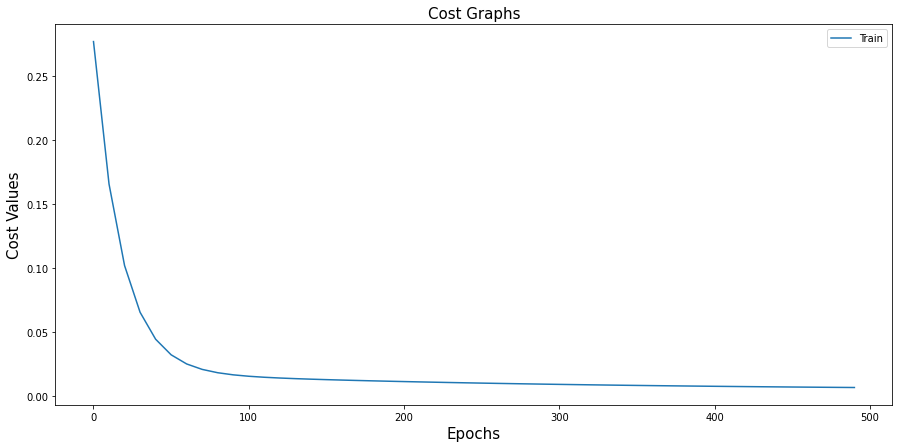

In [ ]:
def cost_graphs(epochs_list,cost_list):
    plt.figure(figsize = (15,7))
    plt.plot(epochs_list, cost_list,label = "Train")
    plt.legend(loc = "best")
    size = 15
    plt.title("Cost Graphs", fontsize = size)
    plt.xlabel("Epochs",fontsize = size)
    plt.ylabel("Cost Values", fontsize = size)
    plt.show()

cost_graphs(epochs_list, cost_list)

In [ ]:
def predict(area, bedrooms, w, b):

    values = sx.transform([[area,bedrooms]])[0]
    scaled_prices = values[0]*w[0] + values[1]*w[1] + b
    prices = sy.inverse_transform([[scaled_prices]])
    
    return print("Price : {}".format(round(prices[0][0],5)))

In [ ]:
predict(2600,4,w,b)

Price : 128.45484


In [ ]:
predict(1000,2,w,b)

Price : 30.25309


# Stochastic Gradient Descent Implementation

In [ ]:
import random

# 0 ile 6 da dahil test etmek istedim !!!
i = 0
while i < 10: 
    print(random.randint(0,6))
    i+=1

6
5
0
3
2
4
2
1
6
4


In [ ]:
def stochastic_gradient_descent(X, y_true, epochs , learning_rate = 0.01):

    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epochs_list = []

    for i in range(epochs):

        random_index = random.randint(0,total_samples-1)

        # 1 Bir tane değer seçtik !!!
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        # Burdan çıkan değerler 1 tane !!!

        y_predicted = np.dot(w, sample_X.T) + b


        w_grad = -(2/total_samples) * (sample_X.T.dot(sample_y-y_predicted)) 
        b_grad = -(2/total_samples) * (y_true-y_predicted)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*b_grad

        cost = np.mean(np.square(sample_y-y_predicted))

        if i % 100 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
            #print(f"Epochs : {i:{5}} , Weights 1 : {round(w,5):{15}}, Bias : {round(bias,5):{15}}, Cost : {round(cost,4):{10}}")

    return w, b , cost_list, epochs_list

In [ ]:
w_sgd, b_sgd, sgd_cost_list, sgd_epochs_list = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), 10000, learning_rate = 0.01)

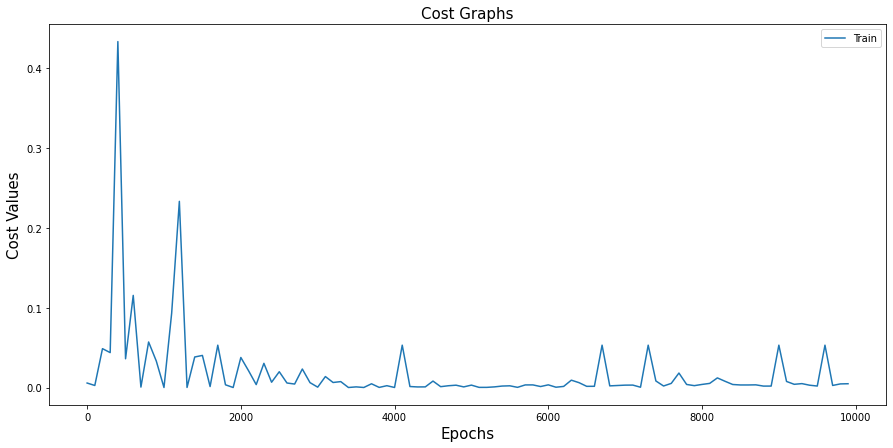

In [ ]:
cost_graphs(sgd_epochs_list, sgd_cost_list)

In [ ]:
w_sgd, b_sgd

(array([0.70133479, 0.6510736 ]), -0.23034857438407427)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

Price : 125.59116


# Mini Batch Gradient Descent

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):


    number_of_features = X.shape[1]

    w = np.ones(shape = (number_of_features))
    bias = 0
    total_samples = X.shape[0]

    if batch_size > total_samples:
        batch_size = total_samples

    cost_list = []
    epochs_list = []

    for i in range(epochs):

        random_indexes = np.random.permutation(total_samples)
        X_select = X[random_indexes]
        y_select = y_true[random_indexes]

        for j in range(0, total_samples, batch_size):

            X_tmp = X_select[j : j + batch_size]
            y_tmp = y_select[j : j + batch_size]

            y_predicted = np.dot(w,X_tmp.T) + bias

            wd = -(2/len(X_tmp)) * (X_tmp.T.dot(y_tmp - y_predicted))
            bd = -(2/len(X_tmp)) * (np.sum(y_tmp - y_predicted))

            w    = w    - learning_rate*wd
            bias = bias - learning_rate*bd

            cost = np.mean(np.square(y_tmp-y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, b , cost_list, epochs_list


In [ ]:
mbgd_w, mbgd_b, mbgd_coss_list, mbgd_epochs_list = mini_batch_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],), epochs = 120, batch_size= 5,learning_rate=0.01)

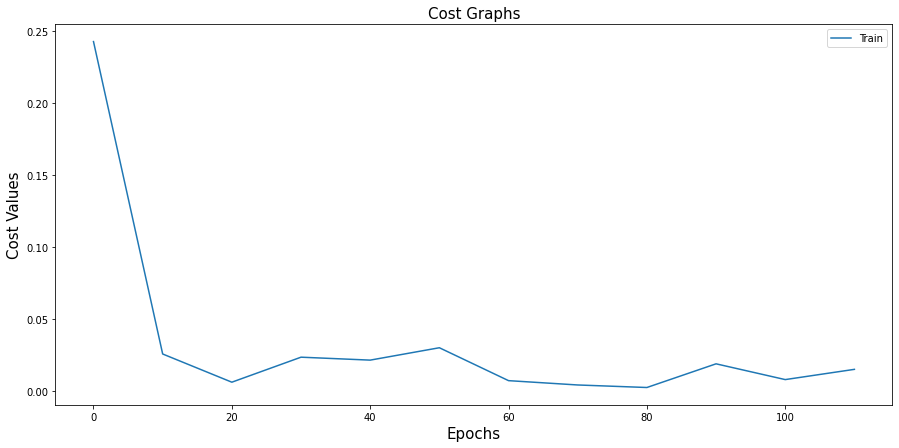

In [ ]:
cost_graphs(mbgd_epochs_list,mbgd_coss_list)

In [ ]:
predict(2600,4, mbgd_w, mbgd_b )

Price : 129.066


In [ ]:
predict(1000,2, mbgd_w, mbgd_b ),predict(1500,3, mbgd_w, mbgd_b )

Price : 30.40106
Price : 69.81635


(None, None)

In [ ]:
a = np.ones(shape = X_Scaled.shape[1] )
a

array([1., 1.])

In [ ]:
np.dot(a, X_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [ ]:
X_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [ ]:
X_scaled.T.dot(y_scaled,)

array([[4.25003556],
       [4.64827778]])

In [ ]:
np.dot(X_scaled.T, y_scaled.reshape(y_scaled.shape[0],))

array([4.25003556, 4.64827778])

In [ ]:
np.dot(a,X_scaled.T).shape

(20,)

In [ ]:
a.shape

(2,)